In [48]:
#!pip install nltk

In [49]:
#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re,string
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

import pickle

nltk.download('stopwords')
%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
df = pd.read_csv('../bbc_text.csv', encoding='latin1')
df = df.sample(frac=1)
df

,category,text
44,tech,pandas benefit from wireless net the world s d...
1130,tech,what price for trusted pc security you can ...
1681,sport,fuming robinson blasts officials england coach...
865,entertainment,brits debate over urban music joss stone a ...
1807,sport,english clubs make euro history all four of en...
...,...,...
1120,politics,blair congratulates bush on win tony blair has...
167,politics,top judge clashes with ministers the uk s top ...
1388,entertainment,jungle tv show ratings drop by 4m the finale o...
1788,entertainment,muslim group attacks tv drama 24 a british mus...


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2225 entries, 44 to 361
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 52.1+ KB


In [52]:
df = df.dropna()
df

,category,text
44,tech,pandas benefit from wireless net the world s d...
1130,tech,what price for trusted pc security you can ...
1681,sport,fuming robinson blasts officials england coach...
865,entertainment,brits debate over urban music joss stone a ...
1807,sport,english clubs make euro history all four of en...
...,...,...
1120,politics,blair congratulates bush on win tony blair has...
167,politics,top judge clashes with ministers the uk s top ...
1388,entertainment,jungle tv show ratings drop by 4m the finale o...
1788,entertainment,muslim group attacks tv drama 24 a british mus...


In [53]:
len(set(df['category']))

5

In [54]:
df.groupby('category').category.count()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: category, dtype: int64

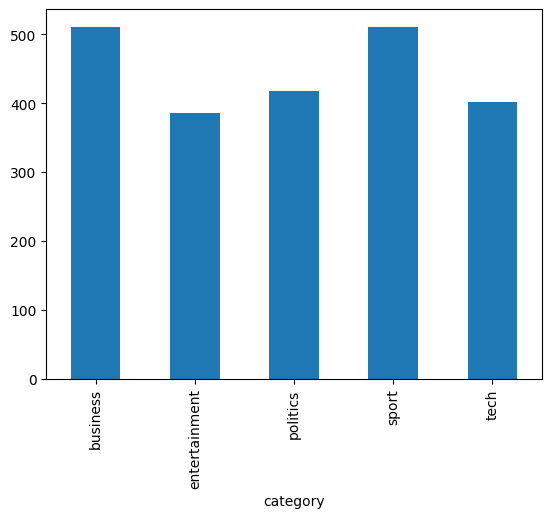

In [55]:
#analyzing the data

df.groupby('category').category.count().plot.bar()

plt.show()

In [56]:
words = stopwords.words('english')
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [57]:
a = "Hello_World!243"
regs = re.sub("[^a-zA-z]", " ", a)
regs

'Hello_World    '

In [58]:
#data cleaning using regs
regs = re.sub("[^a-zA-Z]", " ", df['text'][126].lower())
print(regs)

ibm frees     software patents computer giant ibm says     of its software patents will be released into the open development community   the move means developers will be able to use the technologies without paying for a licence from the company  ibm described the step as a  new era  in how it dealt with intellectual property and promised further patents would be made freely available  the patents include software for a range of practices  including text recognition and database management  traditional technology business policy is to amass patents and despite ibm s announcement the company continues to follow this route   ibm was granted       patents in       more than any other firm in the us  the new york times reports  for each of the past    years ibm has been granted more us patents than any other company  ibm has received        us patents in that period and reportedly has more than        current patents  in a statement  dr john e  kelly  ibm senior vice president  technology

In [59]:
#data ceaning using steemer 

stemmer = PorterStemmer()

data = "I am loving computing".split()

print(data)

" ".join([stemmer.stem(i) for i in data])

['I', 'am', 'loving', 'computing']


'i am love comput'

In [60]:
#data cleaning using stemmer

stemmer = PorterStemmer()

data = df['text'][0].split()

print(data)

" ".join([stemmer.stem(i) for i in data])

['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high-definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time.', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes.', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices.', 'one', 'of', 'the', 'most', 'talked-about', 'technologies', 'of', 'ces', 'has', 

'tv futur in the hand of viewer with home theatr system plasma high-definit tv and digit video record move into the live room the way peopl watch tv will be radic differ in five year time. that is accord to an expert panel which gather at the annual consum electron show in la vega to discuss how these new technolog will impact one of our favourit pastimes. with the us lead the trend programm and other content will be deliv to viewer via home network through cabl satellit telecom compani and broadband servic provid to front room and portabl devices. one of the most talked-about technolog of ce ha been digit and person video record (dvr and pvr). these set-top box like the us s tivo and the uk s sky+ system allow peopl to record store play paus and forward wind tv programm when they want. essenti the technolog allow for much more personalis tv. they are also be built-in to high-definit tv set which are big busi in japan and the us but slower to take off in europ becaus of the lack of hig

In [61]:
# removing stopwords

words = stopwords.words('english')
data = df['text'][0].split()

for i in words:
    if i in data:
        c= data.count(i)
        for j in range(c):
            data.remove(i)
" ".join(data)


'tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us tivo uk sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take europe lack high-definition programming. people forward wind adverts also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satellite companies worried means terms a

In [62]:
# Data cleaning removing stopwords

words = stopwords.words('english')
regs = re.sub("[^a-zA-Z]", " ", df['text'][126].lower())

without_stopwords_news = " ".join([ i for i in regs.split() if i not in words ])
without_stopwords_news

'ibm frees software patents computer giant ibm says software patents released open development community move means developers able use technologies without paying licence company ibm described step new era dealt intellectual property promised patents would made freely available patents include software range practices including text recognition database management traditional technology business policy amass patents despite ibm announcement company continues follow route ibm granted patents firm us new york times reports past years ibm granted us patents company ibm received us patents period reportedly current patents statement dr john e kelly ibm senior vice president technology intellectual property said true innovation leadership numbers patents granted innovating benefit customers partners society pledge today beginning new era ibm manage intellectual property past ibm supported non commercial operating system linux although critics said done attempt undermine microsoft company s

In [64]:
#doing all cleaning process using regex, stemmer, stopwrods for all data


df['cleaned'] = list(map(lambda x: " ".join([i for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]), df['text']))
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([PorterStemmer().stem(i) for i in x.lower().split()]))
df

,category,text,cleaned
44,tech,pandas benefit from wireless net the world s d...,panda benefit wireless net world dwindl panda ...
1130,tech,what price for trusted pc security you can ...,price trust pc secur buy trust comput realli t...
1681,sport,fuming robinson blasts officials england coach...,fume robinson blast offici england coach andi ...
865,entertainment,brits debate over urban music joss stone a ...,brit debat urban music joss stone year old sou...
1807,sport,english clubs make euro history all four of en...,english club make euro histori four england ch...
...,...,...,...
1120,politics,blair congratulates bush on win tony blair has...,blair congratul bush win toni blair said look ...
167,politics,top judge clashes with ministers the uk s top ...,top judg clash minist uk top judg reveal clash...
1388,entertainment,jungle tv show ratings drop by 4m the finale o...,jungl tv show rate drop final itv celebr get d...
1788,entertainment,muslim group attacks tv drama 24 a british mus...,muslim group attack tv drama british muslim gr...


In [66]:
df.to_csv('../cleaned_news.csv')

In [69]:
#Training the model 

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

vectorizer = TfidfVectorizer()

X = df['cleaned']
Y = df['category']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.15)  

#creating pipeling

pipeline = Pipeline([
    ('vect', vectorizer),
    ('chi', SelectKBest(chi2, k =2000)),
    ('clf', LogisticRegression(random_state=1))
])


model = pipeline.fit(X_train, Y_train)

#creating pickle file
with open('news/LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

In [70]:
# to use model

import pickle as pk

filename= 'news/LogisticRegression.pickle'
model = pk.load(open(filename, 'rb'))

In [71]:
print(X_test, Y_test)

1299    troubl marsh sec scrutini us stock market regu...
2222    rem announc new glasgow concert us band rem an...
473     broadband steam ahead us american join interne...
1729    us prepar hybrid onslaught sale hybrid car us ...
692     uk troop ivori coast standbi down street confi...
                              ...                        
429     venezuela identifi idl farm venezuelan author ...
781     europ back digit tv lifestyl peopl receiv digi...
1195    duff rule barcelona clash chelsea damien duff ...
1718    fame music director viotti die conductor marce...
42      hous price show slight increas price home uk r...
Name: cleaned, Length: 334, dtype: object 1299         business
2222    entertainment
473              tech
1729         business
692          politics
            ...      
429          business
781              tech
1195            sport
1718    entertainment
42           business
Name: category, Length: 334, dtype: object


In [72]:
#accuracy 

from sklearn.metrics import accuracy_score

predict_news_test_cat = model.predict(X_test)
predict_news_train_cat = model.predict(X_train)

print(f"Test accouracy = {accuracy_score(Y_test, predict_news_test_cat)}")
print(f"Train accouracy = {accuracy_score(Y_train, predict_news_train_cat)}")


Test accouracy = 0.9730538922155688
Train accouracy = 0.9883659439450027


In [74]:
news = input("Enter news = ")
news_data = {'predict_news' : [news]}

news_data_df = pd.DataFrame(news_data)

predict_news_cat = model.predict(news_data_df['predict_news'])
print(news)
print("Predicted news category = ",predict_news_cat[0])

Venkatesh Iyer is an Indian all-rounder who bats left-handed. Iyer, who was born in Indore, made his T20 debut for Madhya Pradesh against Saurashtra in the Syed Mushtaq Ali Trophy season of 2014–15, marking the start of his professional career. He is known for his hard hitting abilities along with his height in his favor.
Predicted news category =  sport


               precision    recall  f1-score   support

     business       0.94      0.97      0.96        77
entertainment       0.98      1.00      0.99        54
     politics       1.00      0.94      0.97        71
        sport       0.97      1.00      0.99        71
         tech       0.98      0.95      0.97        61

     accuracy                           0.97       334
    macro avg       0.97      0.97      0.97       334
 weighted avg       0.97      0.97      0.97       334

[[75  1  0  1  0]
 [ 0 54  0  0  0]
 [ 3  0 67  0  1]
 [ 0  0  0 71  0]
 [ 2  0  0  1 58]]


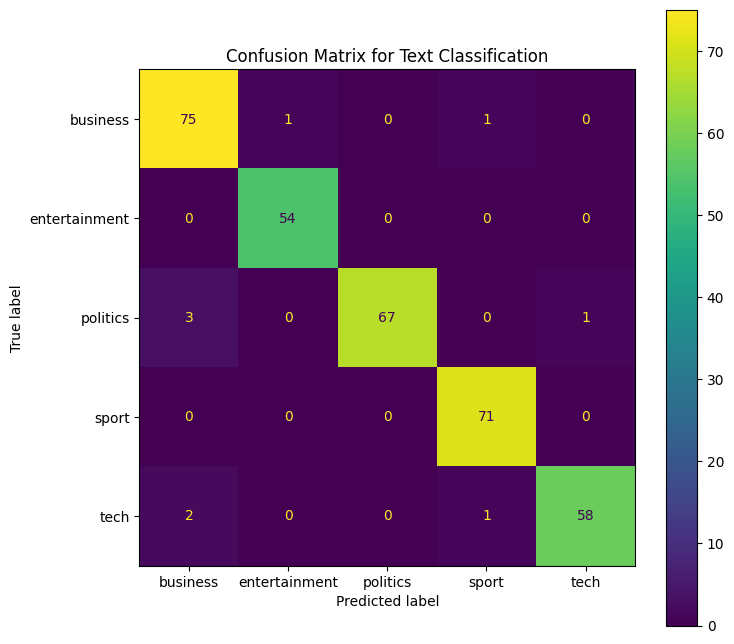

In [76]:
# confusion matrix and classification report(precision, recall, F1-score)

ytest = np.array(Y_test)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytest, model.predict(X_test))

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['business','entertainment','politics','sport','tech']

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for Text Classification')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax)